In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import sklearn
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

sys.path.insert(1, os.path.join(sys.path[0], ".."))
from reproduction.pipeline.load import load_data
from reproduction import analysis

In [27]:
from reproduction.pipeline import into_record

In [3]:
# open/closed cell data dir
CLOSEDATADIR="/home/tkurihana/scratch-midway2/clouds/2017JAN01MOD09GA_close"
CLOSEDS = CLOSEDATADIR+"/closed.tfrecord"
OPENDATADIR="/home/tkurihana/scratch-midway2/clouds/2017JAN01MOD09GA_open"
OPENS = OPENDATADIR+"/open.tfrecord"

In [4]:
OUTPUTDIR="/project/foster/clouds/output"
ENCODER_DEF = OUTPUTDIR+"/mod09cnn15b/encoder.json"

In [5]:
with open(ENCODER_DEF,"r") as f:
    encoder = tf.keras.models.model_from_json(f.read())

In [9]:
N = 30

In [14]:
 def _get_imgs(dataset, ae=None, fields=None, n=500):
        # get data from dataset
        names, coords, imgs = [], [], []
        batch = dataset.make_one_shot_iterator().get_next()
        with tf.Session() as sess:
            while len(imgs) < n:
                names_, coords_, imgs_ = sess.run(batch)
                names.extend(names_)
                coords.extend(coords_)
                imgs.extend(imgs_)
        return imgs

In [16]:
imgs = _get_imgs(load_data(OPENS, encoder.input_shape[1:], repeat=False), n=30)

In [19]:
np.asarray(imgs).shape

(32, 128, 128, 7)

In [20]:
len(imgs)

32

In [23]:
open_imgs = np.asarray(imgs)

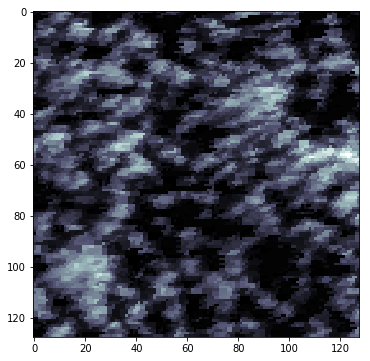

In [26]:
plt.figure(figsize=(8,6))
plt.imshow(open_imgs[0,:,:,0], norm=None, cmap="bone")
plt.show()

In [64]:
sum_ratio = [] 
for i in range(len(imgs)):
    ratio = into_record.get_blob_ratio(open_imgs[i])
    print(i, ratio)
    sum_ratio += [ratio]
mean = np.mean(sum_ratio)
std= np.std(sum_ratio)

0 60.064697265625
1 48.98681640625
2 38.433837890625
3 33.7890625
4 54.290771484375
5 34.600830078125
6 39.39208984375
7 55.57861328125
8 54.16259765625
9 57.65380859375
10 68.829345703125
11 29.925537109375
12 30.029296875
13 55.72509765625
14 27.001953125
15 49.31640625
16 33.087158203125
17 34.552001953125
18 55.096435546875
19 51.79443359375
20 38.800048828125
21 57.354736328125
22 40.0146484375
23 52.923583984375
24 29.571533203125
25 40.4541015625
26 44.68994140625
27 31.11572265625
28 36.810302734375
29 37.78076171875
30 41.14990234375
31 35.4248046875


In [65]:
print(mean)
print(std)

43.70002746582031
10.856163828567215


In [55]:
def _plot_img_ratio(open_imgs, N=30):
    fig = plt.figure(figsize=(20,20))
    row = 6 ; col = 5
    ax = [0]*N
    for index, i in enumerate(range(N)):
        ax[i] = plt.subplot(row, col, index+1)
        ratio = into_record.get_blob_ratio(open_imgs[i])
        ax[i].set_title(" %f " %ratio, fontsize=16 ) 
        img = plt.imshow(open_imgs[i,:,:,0], norm=None, cmap="bone")
    fig.tight_layout()
    plt.show()

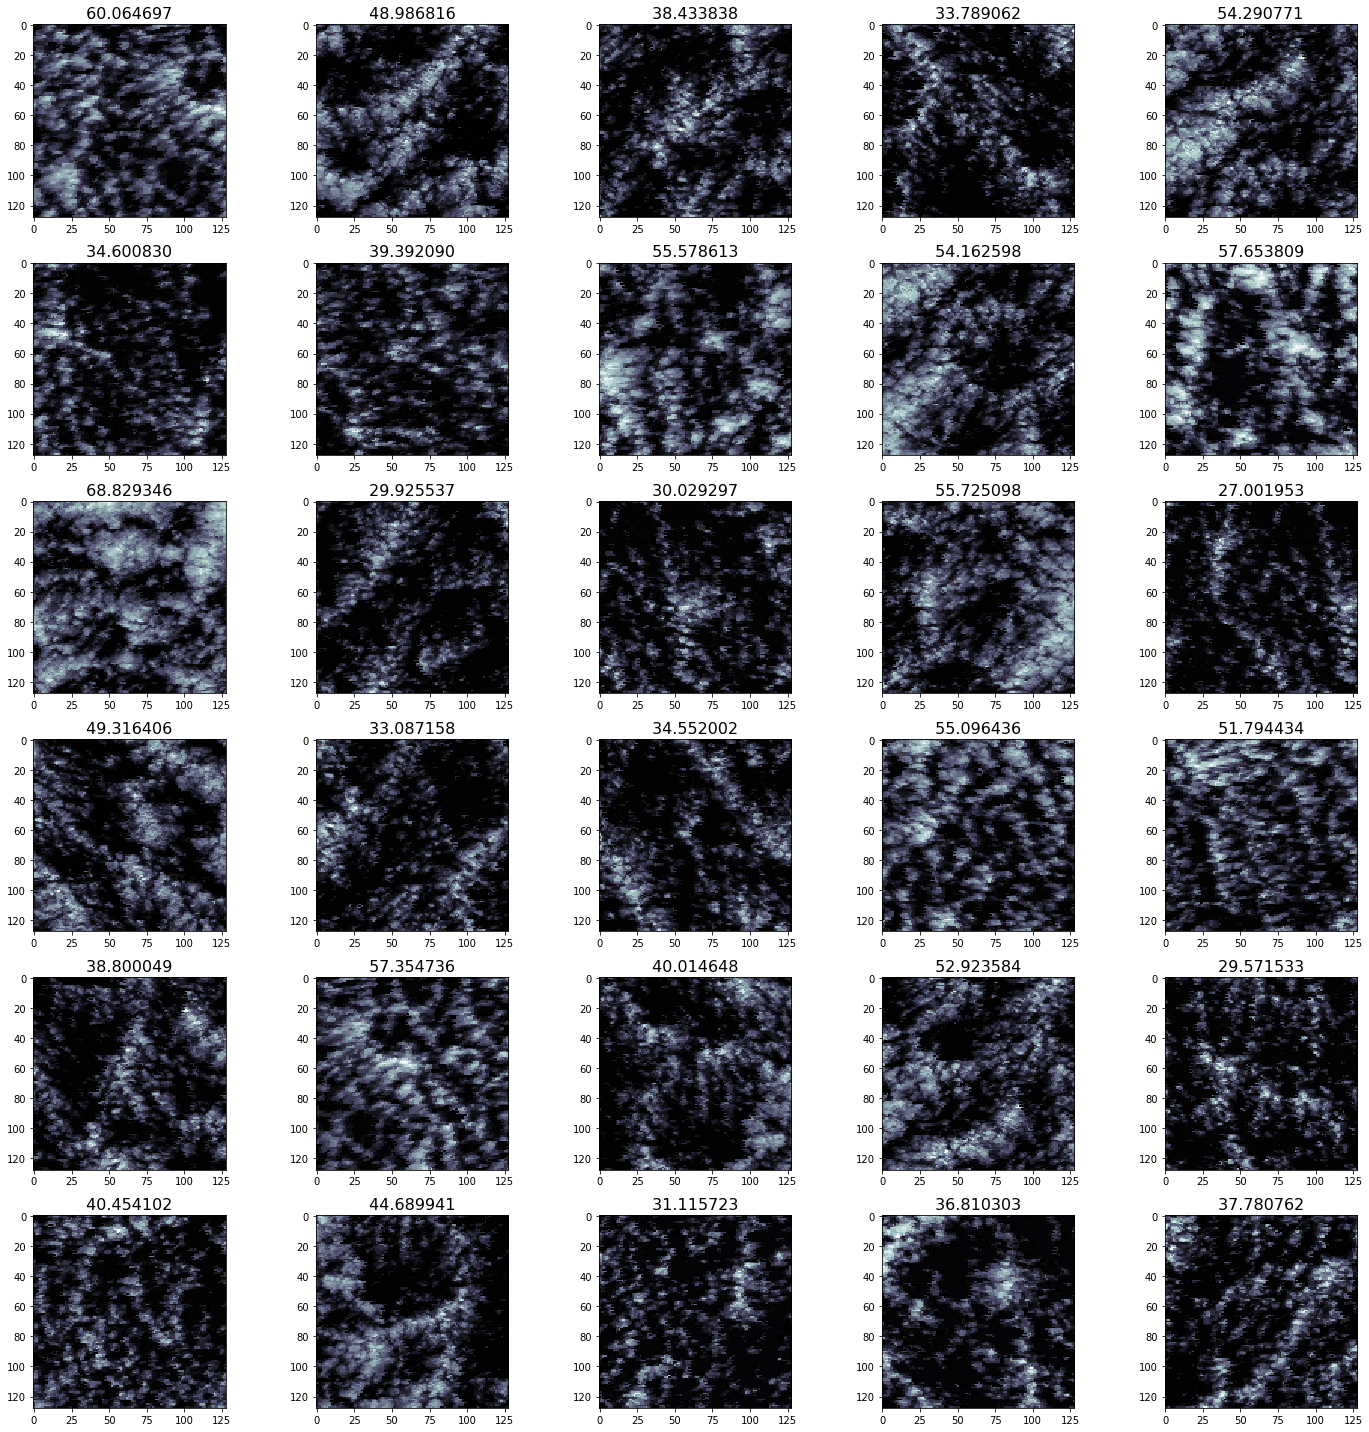

In [56]:
_plot_img_ratio(open_imgs, 30)

In [57]:
_imgs = _get_imgs(load_data(CLOSEDS, encoder.input_shape[1:], repeat=False), n=30)

In [58]:
closed_imgs = np.asarray(_imgs)

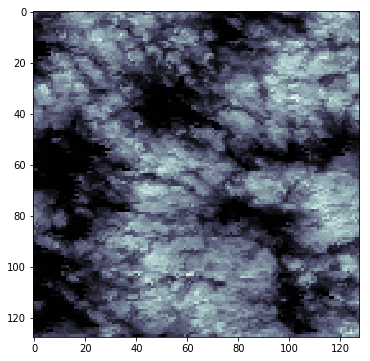

In [59]:
plt.figure(figsize=(8,6))
plt.imshow(closed_imgs[0,:,:,0], norm=None, cmap="bone")
plt.show()

In [66]:
sum_ratio = [] 
for i in range(len(_imgs)):
    ratio = into_record.get_blob_ratio(closed_imgs[i])
    print(i, ratio)
    sum_ratio += [ratio]
mean = np.mean(sum_ratio)
std= np.std(sum_ratio)

0 77.490234375
1 90.56396484375
2 85.369873046875
3 92.254638671875
4 83.544921875
5 79.4677734375
6 89.44091796875
7 77.313232421875
8 94.610595703125
9 95.721435546875
10 98.199462890625
11 79.681396484375
12 88.41552734375
13 87.95166015625
14 86.529541015625
15 93.023681640625
16 95.60546875
17 98.699951171875
18 93.00537109375
19 79.6142578125
20 87.261962890625
21 94.464111328125
22 91.253662109375
23 86.80419921875
24 90.850830078125
25 86.04736328125
26 87.43896484375
27 75.848388671875
28 88.818359375
29 89.776611328125
30 90.570068359375
31 92.78564453125


In [67]:
print(mean)
print(std)

88.38825225830078
6.035262330747696


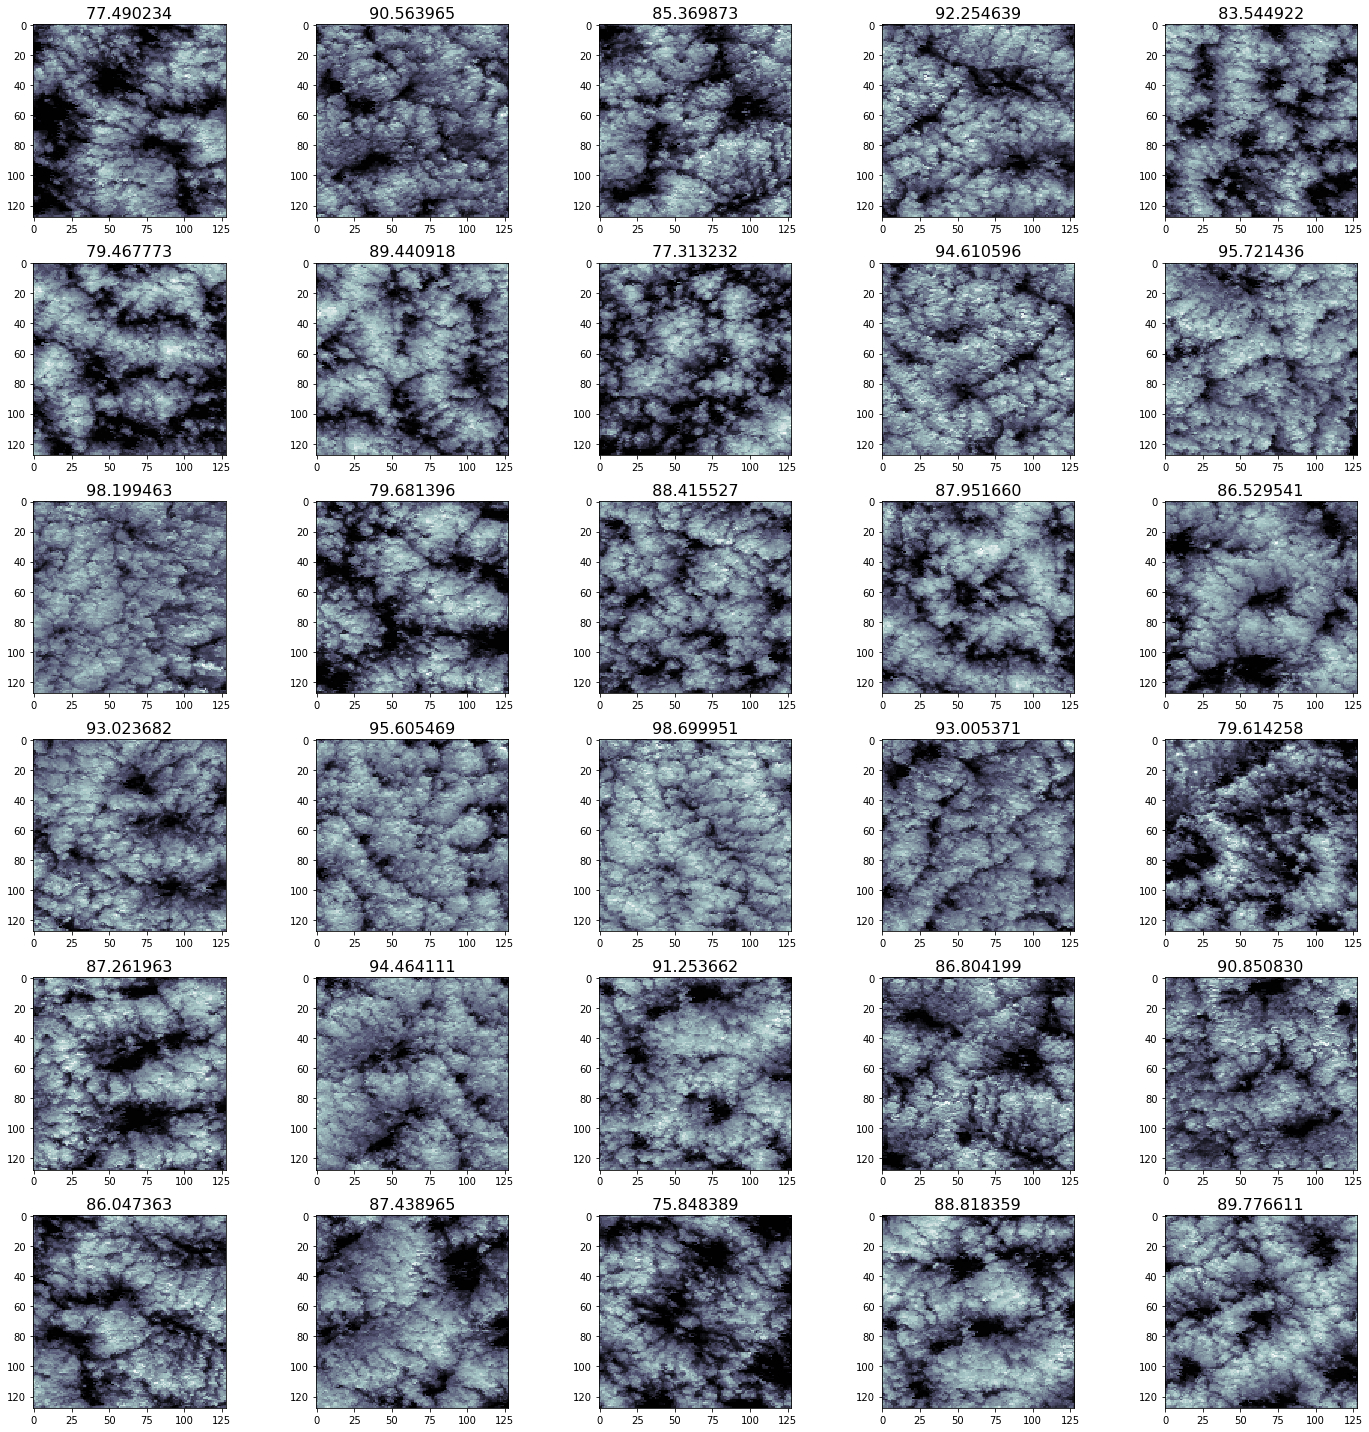

In [61]:
_plot_img_ratio(closed_imgs, 30)

# Check brightness in ambiguous labels

In [81]:
# bright_open/bright_closed cell data dir
# bright_XX = as bright as or as un-bright as 
BCLOSEDATADIR="/home/tkurihana/scratch-midway2/clouds/2017JAN30MOD09GA_ambiguous_closed"
BCLOSEDS = BCLOSEDATADIR+"/bright_closed.tfrecord"
BOPENDATADIR="/home/tkurihana/scratch-midway2/clouds/2017JAN31MOD09GA_ambiguous_open"
BOPENS = BOPENDATADIR+"/bright_open.tfrecord"

In [70]:
bimgs = _get_imgs(load_data(BOPENS, encoder.input_shape[1:], repeat=False), n=30)

In [76]:
open_bimgs = np.asarray(bimgs)
print(open_bimgs.shape)

(32, 128, 128, 7)


In [82]:
_bimgs = _get_imgs(load_data(BCLOSEDS, encoder.input_shape[1:], repeat=False), n=30)

In [83]:
closed_bimgs = np.asarray(_bimgs)
print(closed_bimgs.shape)

(32, 128, 128, 7)


In [84]:
def _stats(img_list,img_array):
    sum_ratio = [] 
    for i in range(len(img_list)):
        ratio = into_record.get_blob_ratio(img_array[i])
        print(i, ratio)
        sum_ratio += [ratio]
    mean = np.mean(sum_ratio)
    std= np.std(sum_ratio)
    return mean, std

In [87]:
mean, std = _stats(bimgs, open_bimgs)
print(" open mean == %f" % mean)
print(" open std  == %f" %std)

0 37.51220703125
1 34.893798828125
2 44.86083984375
3 43.231201171875
4 45.233154296875
5 54.620361328125
6 36.700439453125
7 44.769287109375
8 55.242919921875
9 47.10693359375
10 44.219970703125
11 39.55078125
12 36.981201171875
13 43.1396484375
14 36.553955078125
15 47.882080078125
16 34.33837890625
17 48.291015625
18 36.956787109375
19 36.871337890625
20 35.8642578125
21 48.675537109375
22 39.83154296875
23 43.560791015625
24 42.68798828125
25 45.42236328125
26 45.05615234375
27 46.6064453125
28 43.90869140625
29 36.07177734375
30 36.480712890625
31 38.031005859375
 open mean == 42.223549
 open std  == 5.461396


In [88]:
mean, std = _stats(_bimgs, closed_bimgs)
print(" clsoed mean == %f" % mean)
print(" closed std  == %f" %std)

0 96.30126953125
1 85.919189453125
2 89.495849609375
3 92.66357421875
4 93.6767578125
5 89.666748046875
6 91.656494140625
7 91.14990234375
8 91.7236328125
9 87.725830078125
10 94.0185546875
11 93.98193359375
12 89.73388671875
13 93.231201171875
14 89.068603515625
15 94.403076171875
16 86.920166015625
17 87.46337890625
18 87.506103515625
19 85.418701171875
20 91.46728515625
21 87.19482421875
22 85.0830078125
23 92.7490234375
24 91.790771484375
25 86.553955078125
26 94.012451171875
27 94.51904296875
28 87.384033203125
29 86.480712890625
30 93.670654296875
31 94.00634765625
 clsoed mean == 90.519905
 closed std  == 3.205989


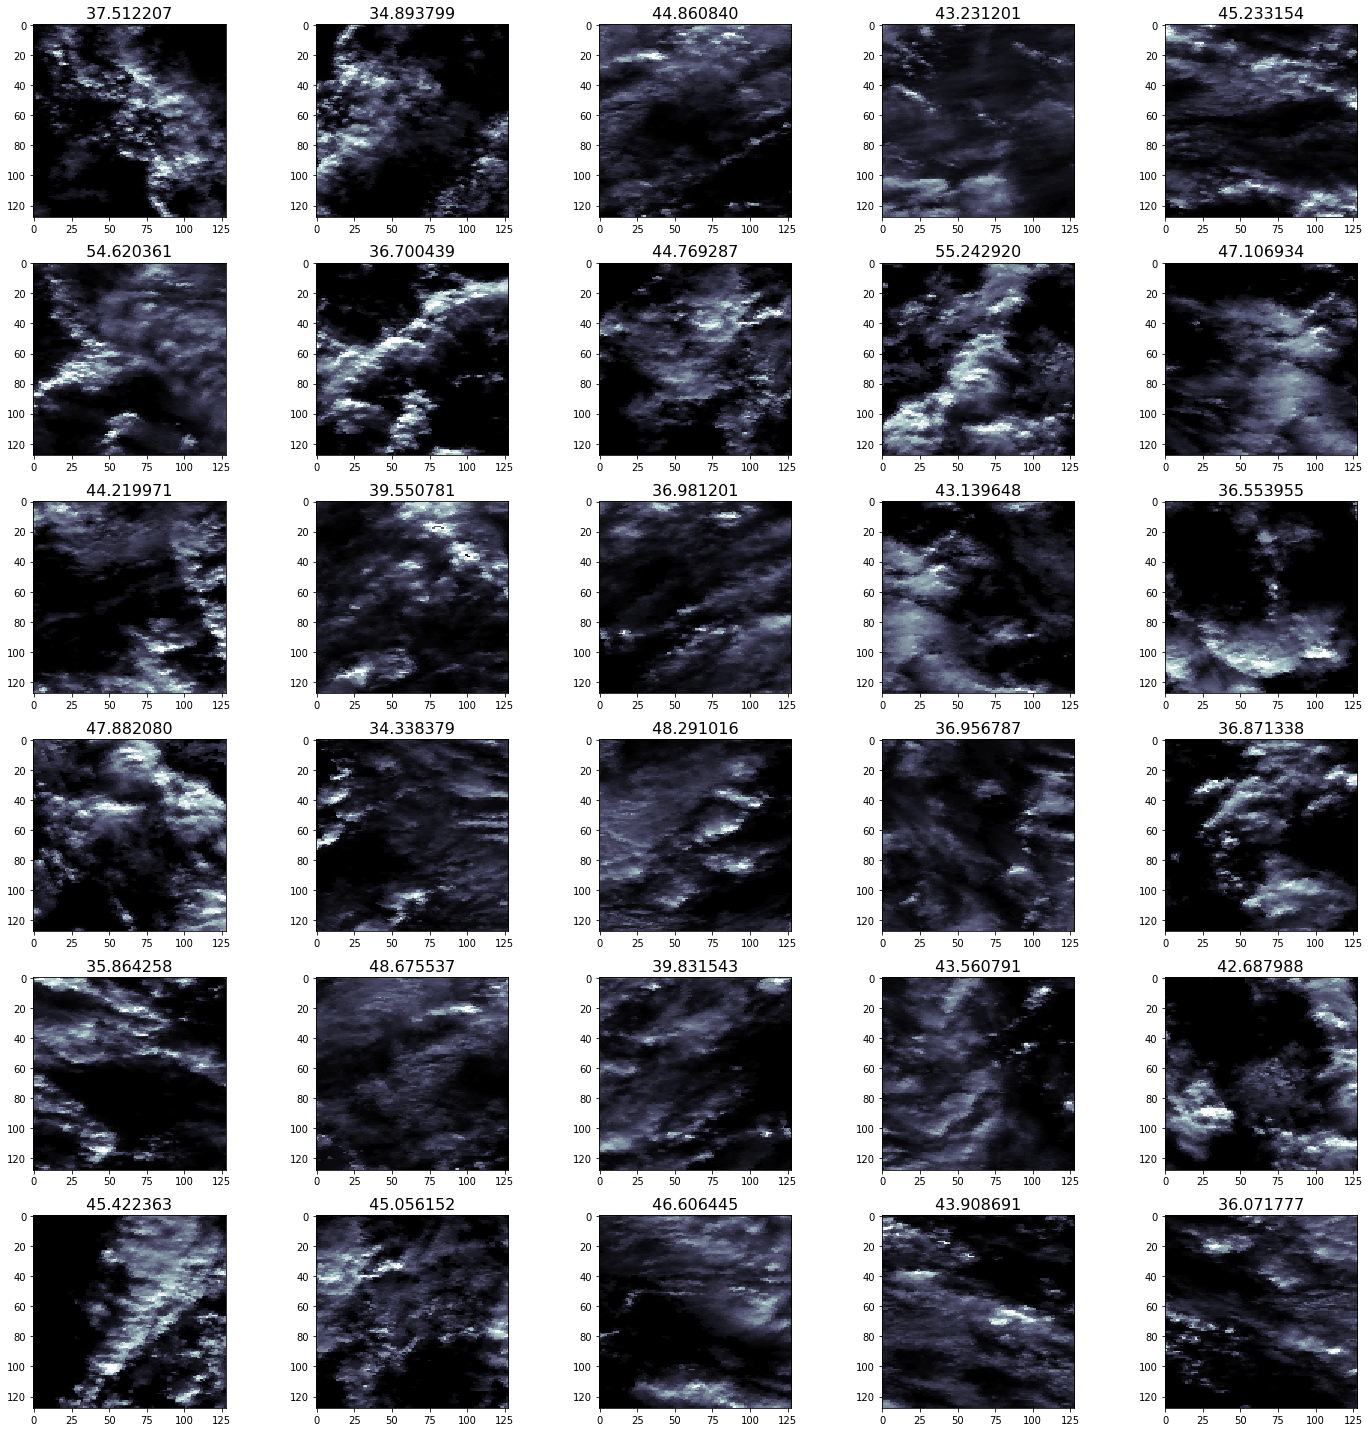

In [89]:
_plot_img_ratio(open_bimgs, 30)

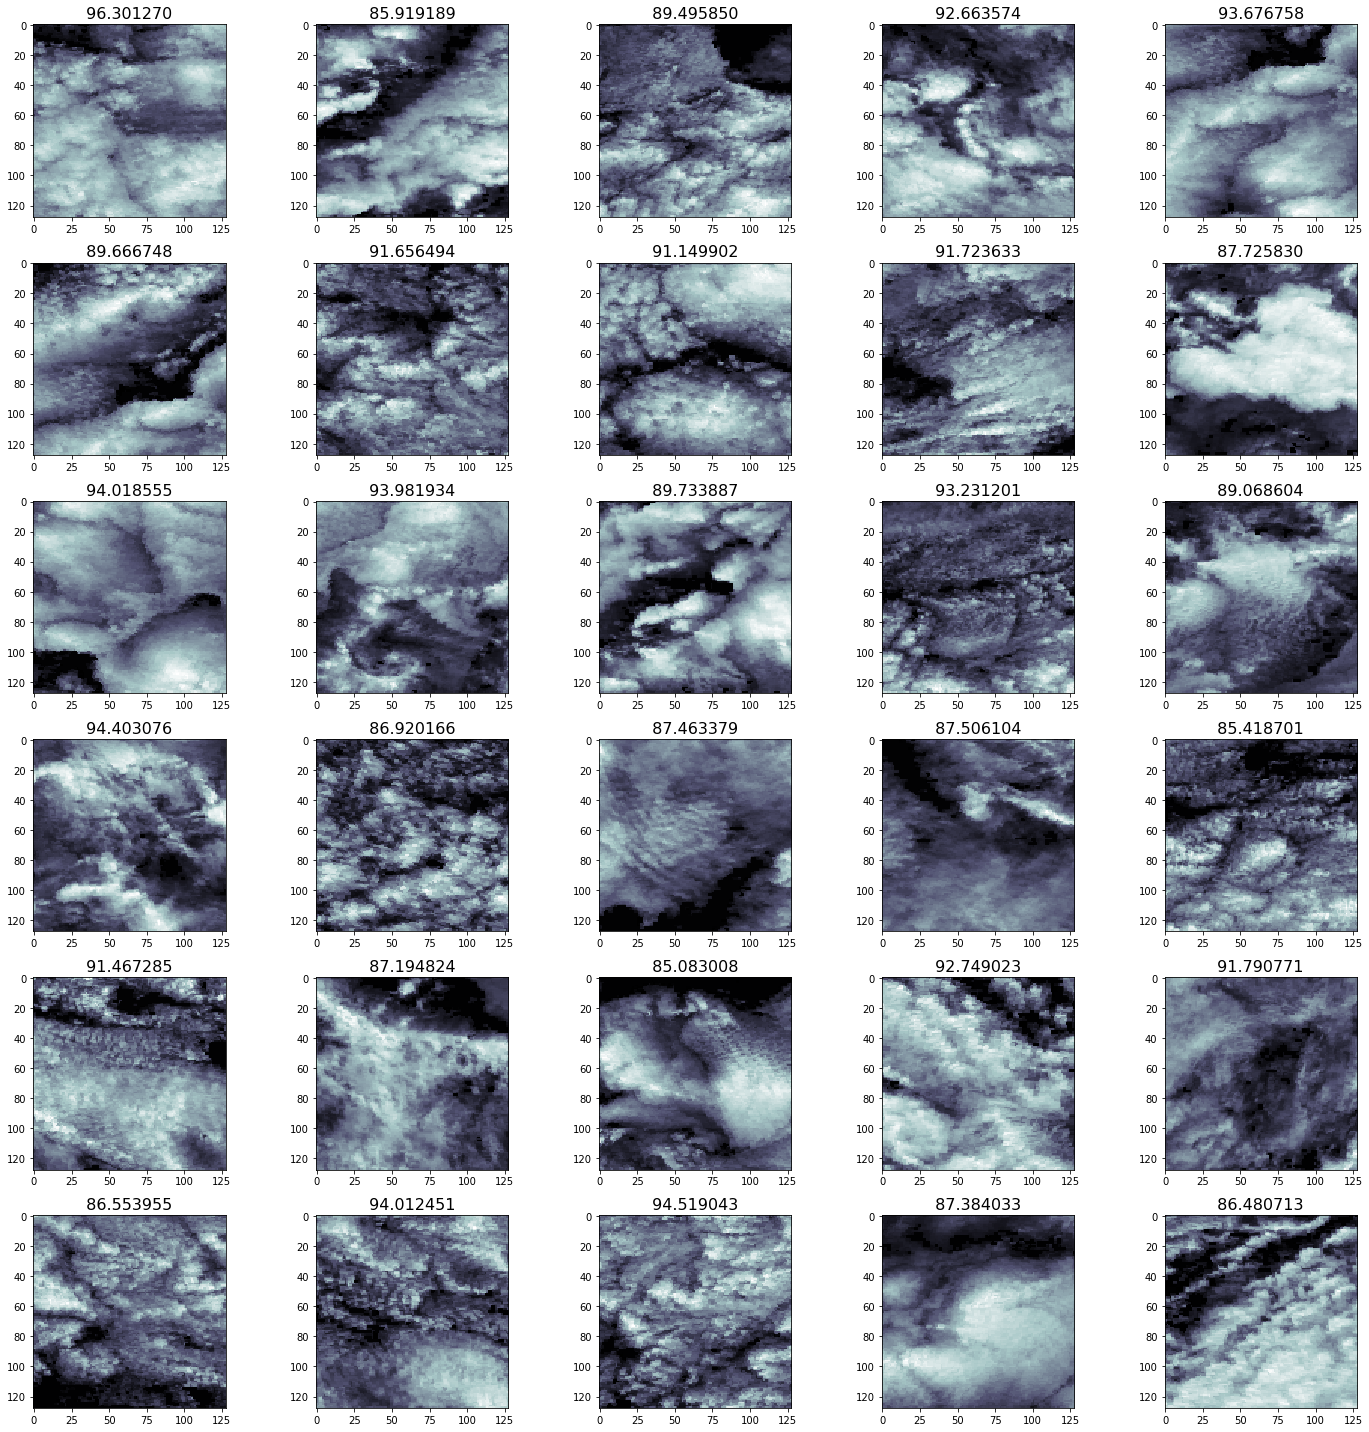

In [90]:
_plot_img_ratio(closed_bimgs, 30)